In [1]:
from astropy.io import fits
import numpy as np
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
import os

hdul = fits.open('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s---smi/parameters.fits')
hdul.info()
print(hdul[1].header)
print(hdul[1].data['MODEL_NAME'])
print(np.min(hdul[1].data['ambient.temperature']),np.max(hdul[1].data['ambient.temperature']))
print(np.min(hdul[1].data['star.temperature']),np.max(hdul[1].data['star.temperature']))

hdul = fits.open('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s---smi/flux.fits')
print(hdul[1].header)

print(hdul[1].data)

hdul = fits.open('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s---s-i/convolved/ALMA-IMF_1mm.fits')
print(hdul[1].data['TOTAL_FLUX'][:,2])



def deg2HMS(ra='', dec='', round=False):
    RA, DEC, rs, ds = '', '', '', ''
    if dec:
        if str(dec)[0] == '-':
            ds, dec = '-', abs(dec)
            deg = int(dec)
            decM = abs(int((dec-deg)*60))
        if round:
            decS = int((abs((dec-deg)*60)-decM)*60)
        else:
            decS = (abs((dec-deg)*60)-decM)*60
        DEC = '{0}{1} {2} {3}'.format(ds, deg, decM, decS)

    if ra:
        if str(ra)[0] == '-':
            rs, ra = '-', abs(ra)
        raH = int(ra/15)
        raM = int(((ra/15)-raH)*60)
        if round:
            raS = int(((((ra/15)-raH)*60)-raM)*60)
        else:
            raS = ((((ra/15)-raH)*60)-raM)*60
        RA = '{0}{1} {2} {3}'.format(rs, raH, raM, raS)

    if ra and dec:
        return (RA, DEC)
    else:
        return RA or DEC
    

Filename: /blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s---smi/parameters.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     22   10000R x 7C   [20A, D, D, D, D, K, D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   68 / length of dimension 1                          NAXIS2  =                10000 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    7 / number of table fields                         TTYPE1  = 'MODEL_NAME'                                        

In [2]:

pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/s*')

cmap=plt.get_cmap('rainbow')


geoms = [x.split("/")[-2] for x in glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/*/')
     if x.split("/")[-2].startswith('s')]

augpars_dict = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/pars/{geom}_augmented.fits')
            for geom in geoms}
classification_dict = {geom: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/real_models/{geom}.fits')
                   for geom in geoms}
for key in classification_dict:
    classification_dict[key].add_index("Model Name")
for key in augpars_dict:
    augpars_dict[key].add_index("MODEL_NAME")

        
color1 = keys1 = 'NIRCam.F115W','NIRCam.F212N', 'NIRCam.F480M','F335M'

tbs_jwst = {cname: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/{geom}/convolved/JWST/{cname}.fits')
       for cname in keys1}        
color2 = keys2 = 'ALMA-IMF_1mm','ALMA-IMF_3mm'
    
tbs_alma = {cname: Table.read(f'/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.2/{geom}/convolved/user_filters/{cname}.fits')
       for cname in keys2}  
isfinite = np.all([np.isfinite(tbs_jwst[key]['TOTAL_FLUX'][:, 5]) & ~(tbs_jwst[key]['TOTAL_FLUX'][:, 5]).mask
                   for key in keys1], axis=0)
isfinite2 = np.all([np.isfinite(tbs_alma[key]['TOTAL_FLUX'][:, 5]) & ~(tbs_alma[key]['TOTAL_FLUX'][:, 5]).mask
                   for key in keys2], axis=0)

jwst_flux = {keys:tbs_jwst[keys]['TOTAL_FLUX'][:, 5] for keys in keys1}
alma_flux = {keys:tbs_alma[keys]['TOTAL_FLUX'][:, 5] for keys in keys2}


    for k, path in enumerate(pathlist):

        geometry = os.path.basename(path).split('/')[-1][:7]
        tempdir = '/blue/adamginsburg/richardson.t/research/flux/%s_tables/'%keyword_to_read3+geometry+'_%stable.fits'%keyword_to_read2
        print(tempdir)
        if not os.path.isfile(tempdir):
            print(tempdir)
            continue
            
        filename = writepath+geometry+'/flux_prop.fits'
        """
        if not os.path.isfile(filename):
            datatable = Table([b6flux, b3flux, dusttemp], names=['B6 flux', 'B3 flux', keyword_to_write])
            datatable.write(filename, overwrite=overwrite)
        """
            
        temptable = Table.read(tempdir)
        model_from_table=temptable['Model Name']
        mass_from_table=temptable[keyword_to_read]

        b6hdul = fits.open(path+'/convolved/ALMA-IMF_1mm.fits')
        b3hdul = fits.open(path+'/convolved/ALMA-IMF_3mm.fits')

        model_from_flux = b3hdul[1].data['MODEL_NAME']
        
        print(model_from_table)
        print(model_from_flux)
        

        if not os.path.isdir(writepath+geometry):
            os.mkdir(writepath+geometry)

        b6flux = b6hdul[1].data['TOTAL_FLUX']
        b3flux = b3hdul[1].data['TOTAL_FLUX']
        
        anotherpath = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel/'
        b7hdul = fits.open(anotherpath+geometry+'/convolved/ALMA-IMF_band7.fits')
        b7flux = b7hdul[1].data['TOTAL_FLUX']

        
        mapping = {model:mass for model, mass in zip(model_from_table, mass_from_table)}
        matchingmass = [mapping.get(item) if mapping.get(item) is not None else np.ones(20)*-99 for item in model_from_flux]
     
        print('ho',len(matchingmass),matchingmass[0])
        
   
        if not overwrite_file:
            dat = Table([b3flux, b6flux, b7flux, model_from_flux, np.array(matchingmass)],
                      names=('b3 flux', 'b6 flux', 'b7 flux','model name', keyword_to_write)
                     )
            dat.write(filename, overwrite=True, format='fits')

        else:
            dat = Table.read(filename)
            
            if overwrite_column:
                dat.replace_column(matchingmass, name=keyword_to_write)
                dat.write(filename, overwrite=True)
            else:
            
                dat.add_column(matchingmass, name=keyword_to_write)
                dat.write(filename, overwrite=True)

            
            
"""
    for i in range(2):
        for j in range(2):
            ind = i*2+j

            b6flux = b6hdul[1].data['TOTAL_FLUX'][model_ind,2+ind]
            b3flux = b3hdul[1].data['TOTAL_FLUX'][model_ind,2+ind]

            dusttemp = temptable['Aperture Temperatures'][:,ind+2]
            logtemp = np.log10(dusttemp)

            ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=1, vmax=3)

            axes[i,j].set_xscale('log')
            axes[i,j].set_yscale('log')
            axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
            axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
            axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+2])
            axes[i,j].set_xlim(1e-9,1e4)
            axes[i,j].set_ylim(3,30)
for i in range(2):
    for j in range(2):            
        xx = np.logspace(-9,4,100)
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')

        color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


        color_bar.set_alpha(1)
        color_bar.draw_all()
    plt.savefig('temperature.png')
"""    
#flux_from_apertures_first_place(pathlist, writepath='./')    




IndentationError: unexpected indent (2981926084.py, line 36)

In [18]:
writepath = '/orange/adamginsburg/w51/TaehwaYoo/SEDmodel_1.2/'
flux_from_apertures_new(pathlist, writepath=writepath,keyword='mass_los',overwrite_file=False,overwrite_column=False)    

flux_from_apertures_new(pathlist, writepath=writepath,keyword='temp_los',overwrite_file=True,overwrite_column=False)    


/blue/adamginsburg/richardson.t/research/flux/mass_tables/s---s-i_subtracted_los_masstable.fits
/blue/adamginsburg/richardson.t/research/flux/mass_tables/s---s-i_subtracted_los_masstable.fits
/blue/adamginsburg/richardson.t/research/flux/mass_tables/s-pbsmi_subtracted_los_masstable.fits
 Model Name
-----------
01CyQqPo_01
01CyQqPo_02
01CyQqPo_03
01CyQqPo_04
01CyQqPo_05
01CyQqPo_06
01CyQqPo_07
        ...
zzcDS5sG_03
zzcDS5sG_04
zzcDS5sG_05
zzcDS5sG_06
zzcDS5sG_07
zzcDS5sG_08
zzcDS5sG_09
Length = 82602 rows
['01CyQqPo_01' '01CyQqPo_02' '01CyQqPo_03' ... 'zzcDS5sG_07' 'zzcDS5sG_08'
 'zzcDS5sG_09']
ho 90000 [8.13545537e-04 1.61829523e-03 3.24520055e-03 6.46995937e-03
 1.29522933e-02 2.60532644e-02 5.16295941e-02 1.00350069e-01
 1.90757014e-01 3.52530356e-01 6.36654443e-01 1.11666784e+00
 1.83385626e+00 2.54082231e+00 2.54082231e+00 2.54082231e+00
 2.54082231e+00 2.54082231e+00 2.54082231e+00 2.54082231e+00]
/blue/adamginsburg/richardson.t/research/flux/mass_tables/s-p-hmi_subtracted_los_m

In [ ]:
def measure_rms(data, noiseregiondir):
    fitsdata = fits.open(data)
    noiseregion= Regions.read(noiseregiondir,format='ds9')
    image = fitsdata[0].data
    wcs = WCS(fitsdata[0].header,naxis=2)

    container = []
    for reg in noiseregion:
        pix_reg = reg.to_pixel(wcs)
        noisemask = pix_reg.to_mask()
        noiseim = noisemask.cutout(image)
        container.append(noiseim.flatten())
    noiseim = list(chain.from_iterable(container))
    std = stats.mad_std(noiseim,ignore_nan=True)
    return std



['B6 flux', 'B3 flux', 'mass']
['B6 flux', 'B3 flux', 'mass']
['B6 flux', 'B3 flux', 'mass']
['B6 flux', 'B3 flux', 'mass']


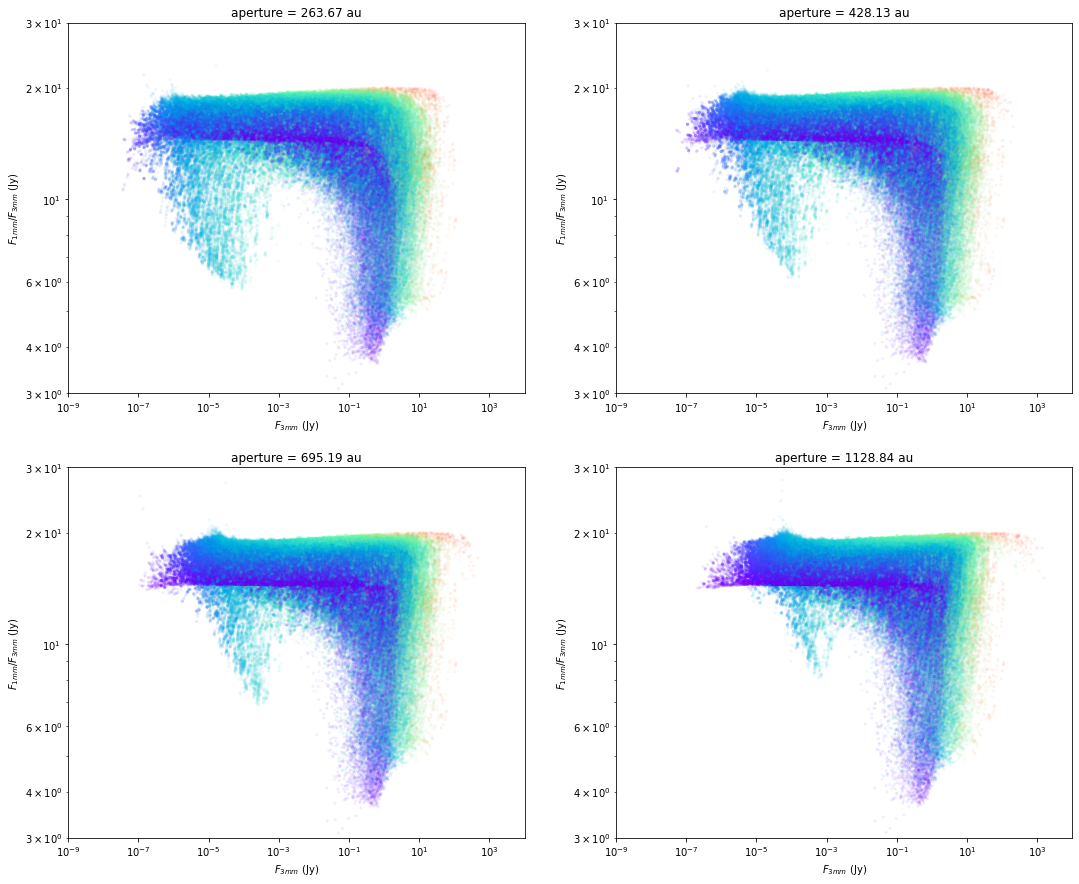

In [65]:
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

geometry = [os.path.basename(path).split('/')[-1][:7] for path in pathlist]

B3err = measure_rms

fig,axes = plt.subplots(2,2,figsize=(18,15))
for path in geometry:
    filepath = './'+path+'/flux_prop.fits'
    if not os.path.isfile(filepath):
        continue
    fluxfile = fits.open(filepath)
    cols = fluxfile[1].columns
    if not 'dust temperature' in cols.names:
        continue
    for i in range(2):
        for j in range(2):
            ind = i*2+j

            b6flux = fluxfile[1].data['B6 flux'][:,2+ind]
            b3flux = fluxfile[1].data['B3 flux'][:,2+ind]
            
            dusttemp = fluxfile[1].data['dust temperature'][:,ind+2]
            notemp = dusttemp>-99
            dusttemp = dusttemp[notemp]
            logtemp = np.log10(dusttemp)
            
            b3flux = b3flux[notemp] ; b6flux = b6flux[notemp]

            ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=1, vmax=3)

            axes[i,j].set_xscale('log')
            axes[i,j].set_yscale('log')
            axes[i,j].set_xlabel('$F_{3mm}$ (Jy)')
            axes[i,j].set_ylabel('$F_{1mm}/F_{3mm}$ (Jy)')
            axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+2])
            axes[i,j].set_xlim(1e-9,1e4)
            axes[i,j].set_ylim(3,30)
            
            axes[i,j].p
plt.show()            

In [ ]:
apertures =np.logspace(2,6,20)
fig,axes = plt.subplots(2,2,figsize=(15,15))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')

cmap=plt.get_cmap('rainbow')

for k, path in enumerate(pathlist):
    
    geometry = os.path.basename(path).split('/')[-1][:7]
    tempdir = '/blue/adamginsburg/richardson.t/research/flux/mass_tables/'+geometry+'_sphere_masstable.fits'

    if not os.path.isfile(tempdir):
        continue
    temptable = Table.read(tempdir)
    model_from_temp=temptable['Model Name']


    b6hdul = fits.open(path+'/convolved/ALMA-IMF_1mm.fits')
    b3hdul = fits.open(path+'/convolved/ALMA-IMF_3mm.fits')

    model_from_flux = b3hdul[1].data['MODEL_NAME']

    model_ind = [n for n in range(len(model_from_flux)) if model_from_flux[n][:-3] in model_from_temp]
    print(len(model_ind), len(b3flux), len(model_from_temp))
    multiple = len(model_ind)/len(model_from_temp)
    print(multiple)



    
    for i in range(2):
        for j in range(2):
            ind = i*2+j

            b6flux = b6hdul[1].data['TOTAL_FLUX'][:,2+ind]
            b3flux = b3hdul[1].data['TOTAL_FLUX'][:,2+ind]
            b6flux = b6flux[model_ind]
            b3flux = b3flux[model_ind]

            dusttemp = temptable['Sphere Masses'][:,ind+2]
            logtemp = np.log10(dusttemp)

            ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=np.repeat(logtemp,multiple), cmap=cmap, vmin=-2, vmax=1)


for i in range(2):
    for j in range(2):            
        xx = np.logspace(-9,4,100)
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**4, label=r'$\alpha=4$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**3, label=r'$\alpha=3$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq)**2, label=r'$\alpha=2$', ls='dashed')
        axes[i,j].plot(xx, np.ones(len(xx))*(b6freq/b3freq), label=r'$\alpha=1$', ls='dashed')
        axes[i,j].legend(loc='lower left')
        axes[i,j].set_xlim(1e-9,1e4)
        axes[i,j].set_ylim(3,30)
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+2])
        color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)


        color_bar.set_alpha(1)
        color_bar.draw_all()
plt.savefig('spheremass.png')

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,15))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')
print(len(pathlist))
cmap=plt.get_cmap('rainbow')
for i in range(2):
    for j in range(2):
        ind = i*2+j
        for k, path in enumerate(pathlist):
            b6hdul = fits.open(path+'/convolved/ALMA-IMF_1mm.fits')
            b6flux = b6hdul[1].data['TOTAL_FLUX'][:,2+ind]
            b3hdul = fits.open(path+'/convolved/ALMA-IMF_3mm.fits')
            b3flux = b3hdul[1].data['TOTAL_FLUX'][:,2+ind]
            
            modelname = b3hdul[1].data['MODEL_NAME']
            
            parhdul = fits.open(path+'/parameters.fits')
            pardata = parhdul[1].data
            matchind = np.where(modelname==pardata['MODEL_NAME'])[0]
            try:
                startemp = pardata['ambient.temperature'][matchind]
                logtemp = np.log10(startemp)

                ss = axes[i,j].scatter(b3flux, b6flux/b3flux,s=5,alpha=0.05, c=logtemp, cmap=cmap, vmin=1, vmax=3)
            except:
                continue

        if ind==0:
            color_bar = plt.colorbar(ss, ax=axes[i,j],alpha=1)
            
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('1mm flux (Jy)')
        axes[i,j].set_ylabel('3mm flux (Jy)')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+1])
color_bar.set_alpha(1)
color_bar.draw_all()
plt.savefig('temperature_dust.png')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


18


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

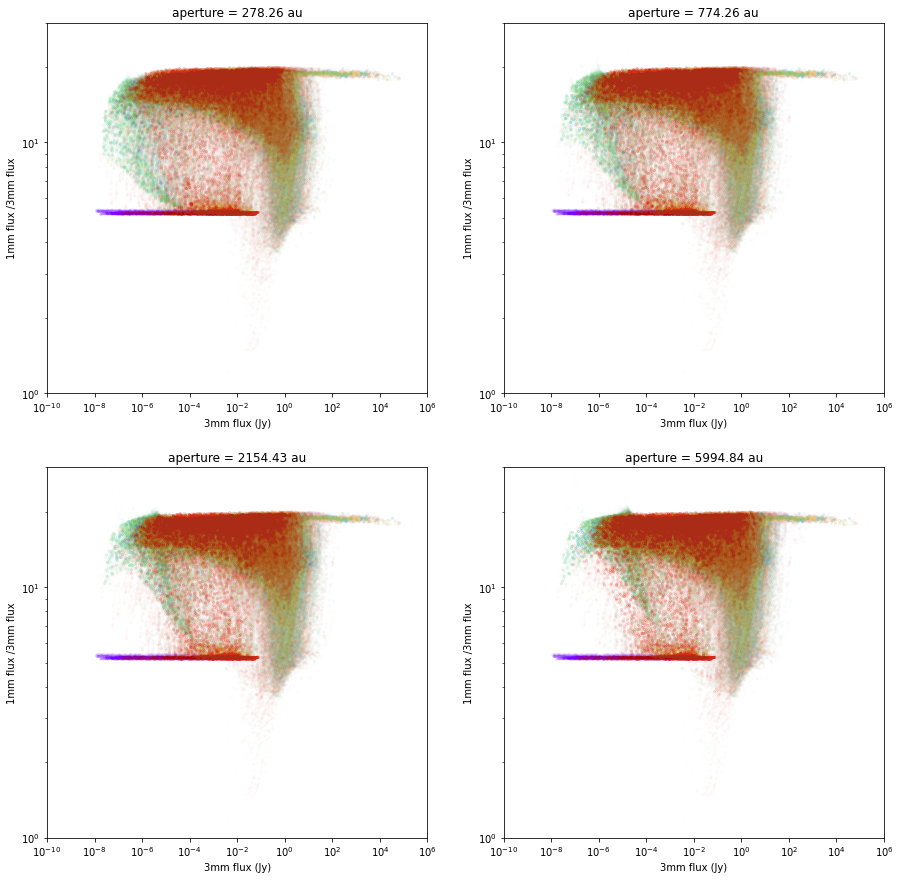

In [143]:

apertures =np.logspace(2,6,10)
fig,axes = plt.subplots(2,2,figsize=(15,15))
pathlist = glob.glob('/blue/adamginsburg/richardson.t/research/flux/robitaille_models-1.1/s*')
print(len(pathlist))
cmap=plt.get_cmap('rainbow')
for i in range(2):
    for j in range(2):
        ind = i*2+j
        for k, path in enumerate(pathlist):
            b6hdul = fits.open(path+'/convolved/ALMA-IMF_1mm.fits')
            b6flux = b6hdul[1].data['TOTAL_FLUX'][:,1+ind]
            b3hdul = fits.open(path+'/convolved/ALMA-IMF_3mm.fits')
            b3flux = b3hdul[1].data['TOTAL_FLUX'][:,1+ind]

            
            axes[i,j].scatter(b3flux, b6flux/b3flux ,s=5,alpha=0.01, c=cmap(k/len(pathlist)))
        
        axes[i,j].set_xscale('log')
        axes[i,j].set_yscale('log')
        axes[i,j].set_xlabel('3mm flux (Jy)')
        axes[i,j].set_ylabel('1mm flux /3mm flux')
        axes[i,j].set_title('aperture = %3.2f au'%apertures[ind+1])
        axes[i,j].set_xlim(1e-10,1e6)
        axes[i,j].set_ylim(1,30)

plt.savefig('geometry.png')
